In [1]:
import numpy as np
import pandas as pd
import matplotlib.image as mpim
import matplotlib.pyplot as plt
%matplotlib inline

from keras import backend as K
K.set_image_dim_ordering('th')
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape, InputLayer
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D, MaxPooling2D

C:\ProgramData\Anaconda3\envs\py36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [6]:
#download from https://www.kaggle.com/yufengg/fashion-mnist/data
train_data = pd.read_csv('./data/train.csv')
test_data = pd.read_csv('./data/test.csv')

In [7]:
objects = {0: 'T-shirt/top',
           1: 'Trouser',
           2: 'Pullover',
           3: 'Dress',
           4: 'Coat',
           5: 'Sandal',
           6: 'Shirt',
           7: 'Sneaker',
           8: 'Bag',
           9: 'Ankle boot'}

In [12]:
images = train_data.iloc[:, 1:]
labels = train_data.iloc[:, 0]

In [13]:
labels = labels.as_matrix()
images = images.as_matrix().reshape(images.shape[0], 1, 28, 28)

In [14]:
labels = np_utils.to_categorical(labels)

In [15]:
train_features, vali_features, train_labels, vali_labels = train_test_split(images, labels, 
                                                                           test_size=0.15, random_state=200)

In [16]:
print('train_features', train_features.shape)
print('vali_features', vali_features.shape)
print('train_labels', train_labels.shape)
print('vali_labels', vali_labels.shape)

train_features (51000, 1, 28, 28)
vali_features (9000, 1, 28, 28)
train_labels (51000, 10)
vali_labels (9000, 10)


In [17]:
epochs = 30
batch_size = 256

n_classes = 10
model = Sequential()

model.add(InputLayer(input_shape=(1, 28, 28)))
model.add(BatchNormalization())
model.add(Conv2D(64, (5, 5), activation='relu',
          bias_initializer='RandomNormal', kernel_initializer='random_uniform'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(512, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.35))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.35))
model.add(Dense(n_classes, activation='softmax'))

In [19]:
from keras.optimizers import Adam
opt = Adam(decay=0.001)

In [20]:
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1, 28, 28)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 1, 28, 28)         112       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 24, 24)        1664      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 12, 12)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 512, 8, 8)         819712    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 512, 4, 4)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
__________

In [22]:
import time
start_time = time.time()

training = model.fit(train_features, train_labels,
                     validation_data=(vali_features, vali_labels),
                     epochs=epochs,
                     batch_size=batch_size, 
                     verbose=1)
training_time = time.time() - start_time

Train on 51000 samples, validate on 9000 samples
Epoch 1/30
51000/51000 [==============================] - 8s 154us/step - loss: 0.7737 - acc: 0.7255 - val_loss: 0.3858 - val_acc: 0.8638
Epoch 2/30
51000/51000 [==============================] - 5s 105us/step - loss: 0.4438 - acc: 0.8509 - val_loss: 0.3232 - val_acc: 0.8893
Epoch 3/30
51000/51000 [==============================] - 5s 106us/step - loss: 0.3652 - acc: 0.8784 - val_loss: 0.2865 - val_acc: 0.8962
Epoch 4/30
51000/51000 [==============================] - 5s 106us/step - loss: 0.3147 - acc: 0.8940 - val_loss: 0.2576 - val_acc: 0.9079
Epoch 5/30
51000/51000 [==============================] - 5s 106us/step - loss: 0.2856 - acc: 0.9043 - val_loss: 0.2538 - val_acc: 0.9091
Epoch 6/30
51000/51000 [==============================] - 5s 106us/step - loss: 0.2616 - acc: 0.9100 - val_loss: 0.2475 - val_acc: 0.9111
Epoch 7/30
51000/51000 [==============================] - 5s 106us/step - loss: 0.2336 - acc: 0.9181 - val_loss: 0.2417 - v

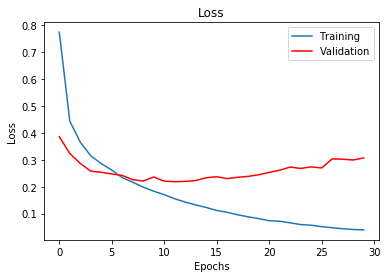

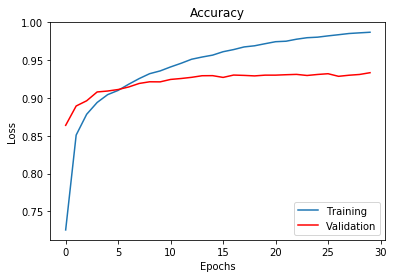

In [23]:
loss = training.history['loss']
val_loss = training.history['val_loss']
acc = training.history['acc']
val_acc = training.history['val_acc']

tra = plt.plot(loss)
val = plt.plot(val_loss, 'r')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend(["Training", "Validation"])
plt.show()

plt.plot(acc)
plt.plot(val_acc, 'r')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Accuracy')
plt.legend(['Training', 'Validation'], loc=4)
plt.show()

In [24]:
test_images = test_data.iloc[:, 1:]
test_labels = test_data.iloc[:, 0]
test_labels = test_labels.as_matrix()
test_features = test_images.as_matrix().reshape(test_images.shape[0], 1, 28, 28)

In [25]:
from sklearn.metrics import accuracy_score
pred = model.predict(test_features)
pred_digits = np.argmax(pred, axis=1)

In [26]:
accuracy_score(test_labels, pred_digits)

0.9341

# original MNIST

In [27]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [29]:
train_features = x_train.reshape((x_train.shape[0], 1, 28, 28))
test_features = x_test.reshape((x_test.shape[0], 1, 28, 28))

In [30]:
train_labels = np_utils.to_categorical(y_train)
train_features, vali_features, train_labels, vali_labels = train_test_split(train_features, train_labels, 
                                                                           test_size=0.15, random_state=80)

In [31]:
opt = Adam(decay=0.001)
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [32]:
training2 = model.fit(train_features, train_labels,
                     validation_data=(vali_features, vali_labels),
                     epochs=epochs,
                     batch_size=batch_size, 
                     verbose=1)

Train on 51000 samples, validate on 9000 samples
Epoch 1/30
51000/51000 [==============================] - 6s 112us/step - loss: 0.5994 - acc: 0.8284 - val_loss: 0.0893 - val_acc: 0.9769
Epoch 2/30
51000/51000 [==============================] - 5s 101us/step - loss: 0.1539 - acc: 0.9585 - val_loss: 0.0578 - val_acc: 0.9849
Epoch 3/30
51000/51000 [==============================] - 5s 102us/step - loss: 0.1056 - acc: 0.9716 - val_loss: 0.0478 - val_acc: 0.9881
Epoch 4/30
51000/51000 [==============================] - 5s 102us/step - loss: 0.0771 - acc: 0.9794 - val_loss: 0.0445 - val_acc: 0.9890
Epoch 5/30
51000/51000 [==============================] - 5s 102us/step - loss: 0.0614 - acc: 0.9835 - val_loss: 0.0486 - val_acc: 0.9884
Epoch 6/30
51000/51000 [==============================] - 5s 102us/step - loss: 0.0512 - acc: 0.9867 - val_loss: 0.0427 - val_acc: 0.9904
Epoch 7/30
51000/51000 [==============================] - 5s 102us/step - loss: 0.0407 - acc: 0.9885 - val_loss: 0.0431 - v

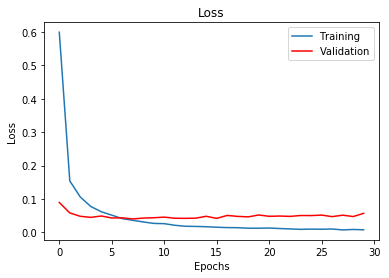

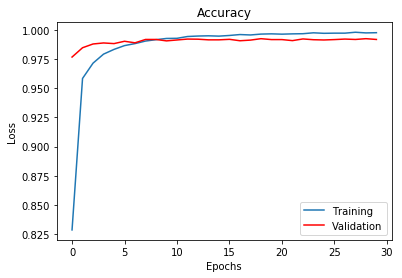

In [33]:
loss = training2.history['loss']
val_loss = training2.history['val_loss']
acc = training2.history['acc']
val_acc = training2.history['val_acc']

tra = plt.plot(loss)
val = plt.plot(val_loss, 'r')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend(["Training", "Validation"])
plt.show()

plt.plot(acc)
plt.plot(val_acc, 'r')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Accuracy')
plt.legend(['Training', 'Validation'], loc=4)
plt.show()

In [35]:
test_labels = y_test
pred = model.predict(test_features)
pred_digits = np.argmax(pred, axis=1)

In [36]:
accuracy_score(test_labels, pred_digits)

0.9938